In [52]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [53]:
#1. Splitting the dataset into training and testing sets (70:30)

import shutil

# Define the working directory path
working_dir = '/Users/vishaljanapati/Downloads/Coding Assignment 3'

# Define the directory paths for the emotion subdirectories
emotions_dir = {
    'fear': os.path.join(working_dir, 'fear'),
    'sad': os.path.join(working_dir, 'sad'),
    'happy': os.path.join(working_dir, 'happy'),
    'angry': os.path.join(working_dir, 'angry')
}

# Define the directory paths for the train and test datasets
train_dir = os.path.join(working_dir, 'train')
test_dir = os.path.join(working_dir, 'test')

# Create the train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through the emotion subdirectories
for emotion, dir_path in emotions_dir.items():
    # Get a list of all audio files in the emotion subdirectory
    audio_files = [f for f in os.listdir(dir_path) if f.endswith('.wav')]
    
    # Shuffle the audio files
    random.shuffle(audio_files)
    
    # Split the audio files into train and test datasets
    train_files = audio_files[:70]
    test_files = audio_files[70:]
    
    # Create the emotion subdirectories in the train and test directories
    os.makedirs(os.path.join(train_dir, emotion), exist_ok=True)
    os.makedirs(os.path.join(test_dir, emotion), exist_ok=True)
    
    # Copy the train files to the train directory
    for file_name in train_files:
        src_path = os.path.join(dir_path, file_name)
        dst_path = os.path.join(train_dir, emotion, file_name)
        shutil.copy(src_path, dst_path)
    
    # Copy the test files to the test directory
    for file_name in test_files:
        src_path = os.path.join(dir_path, file_name)
        dst_path = os.path.join(test_dir, emotion, file_name)
        shutil.copy(src_path, dst_path)


Training distribution:  {'fear': 70, 'sad': 70, 'happy': 70, 'angry': 70}
Testing distribution:  {'fear': 30, 'sad': 30, 'happy': 30, 'angry': 30}

Data for wag_happy


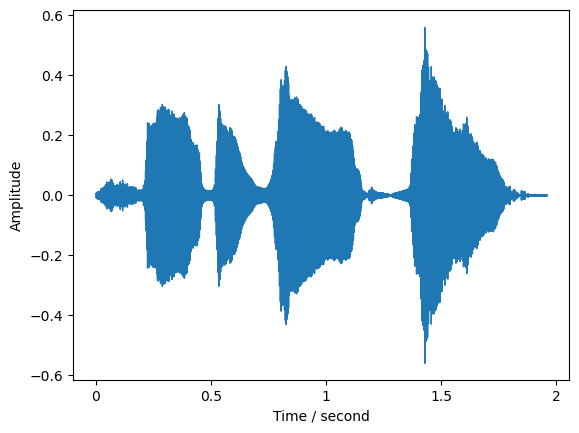

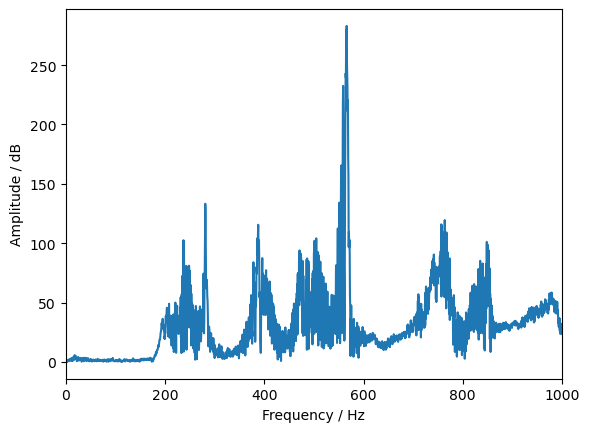

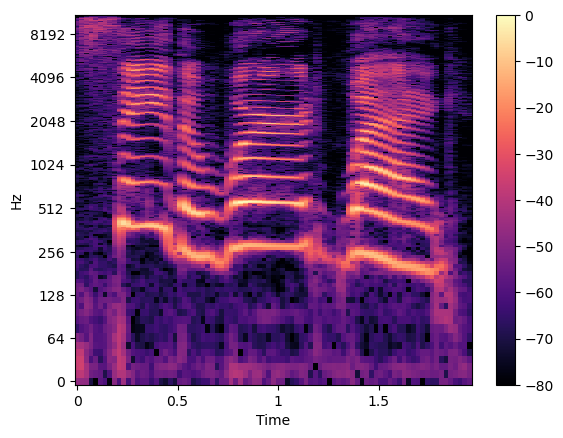

Data for void_fear


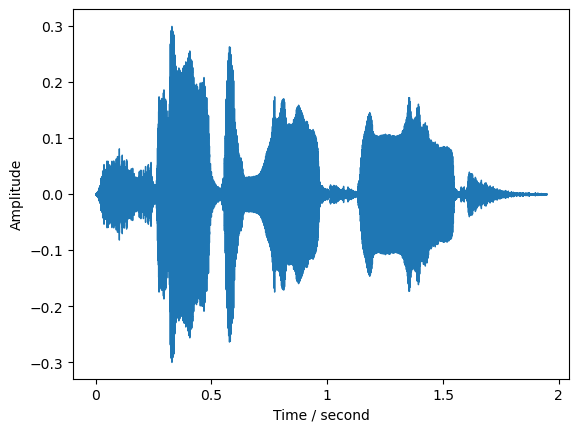

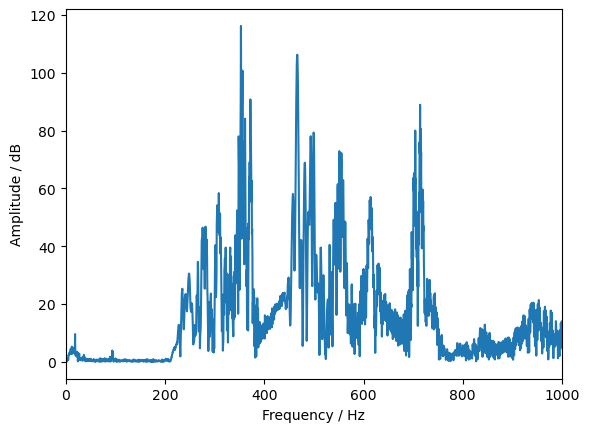

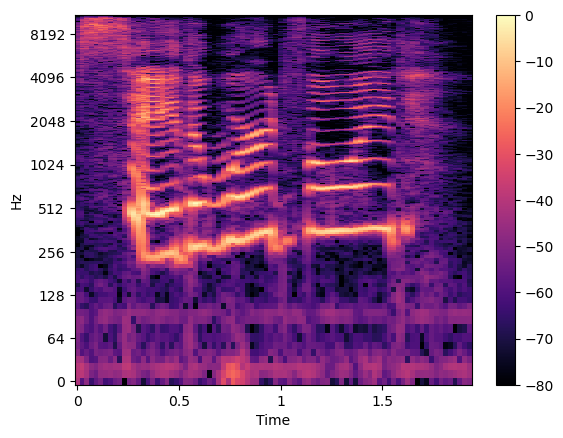

In [69]:
#2. Exploratory Data Analysis

#Label Distribution

#training
trainCount = {"fear": 0, "sad": 0, "happy": 0, "angry": 0}
trainDir = './train'
for subdir in os.listdir():
    subdir_path = os.path.join(trainDir, subdir)
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            emotion = file_path.split("_")[-1].split(".")[0]
            trainCount[emotion] += 1
print("Training distribution: ", trainCount)

#testing
testCount = {"fear": 0, "sad": 0, "happy": 0, "angry": 0}
testDir = './test'
for subdir in os.listdir():
    subdir_path = os.path.join(testDir, subdir)
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            emotion = file_path.split("_")[-1].split(".")[0]
            testCount[emotion] += 1
print("Testing distribution: ", testCount)
print()
#First sample file: YAF_wag_happy.wav
signal, sample_rate = librosa.load('./happy/YAF_wag_happy.wav')

# plot audio files in time domain
print("Data for wag_happy")
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

#Second sample file: YAF_void_fear.wav
signal, sample_rate = librosa.load('./fear/YAF_void_fear.wav')

# plot audio files in time domain
print("Data for void_fear")
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [102]:
#3. Acoustic Feature Extraction

import pandas as pd
def extractFeatures(filename):
    #feature_matrix = []
    #fullPath = os.path.join(train_dir, emotion)
    #for file in os.listdir(fullPath):
    #    if file.endswith('.wav'):
    #        file_path = os.path.join(fullPath, file)
    #        
    signal, sample_rate = librosa.load(filename)
    emotionType = filename.split("_")[-1].split(".")[0]
    
    #audio feature extraction: loudness
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    df_loudness = pd.DataFrame(rms[0][:12], columns=['Loudness'])
    
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        
    #audio feature extraction: zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate = pd.DataFrame(zcr[0][:12], columns=['ZCR'])

    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]

    # combine all features
    #featureVec = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    featureVec = pd.concat([df_mfccs, df_chroma, df_mel_spectrogram], axis=1)
    #feature_matrix.append(featureVec)

    return emotionType, featureVec

 
path = './train'
emotions = ['fear', 'sad', 'happy', 'angry']
trainEmotions = []
trainFeatures = []
for subdir in os.listdir(path):
    subdir_path = os.path.join(path, subdir)
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            emotionType, featureVec = extractFeatures(file_path)
            trainEmotions.append(emotionType)
            trainFeatures.append(featureVec.values)

path2 = './test'
emotions = ['fear', 'sad', 'happy', 'angry']
testEmotions = []
testFeatures = []
for subdir in os.listdir(path2):
    subdir_path = os.path.join(path2, subdir)
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            emotionType, featureVec = extractFeatures(file_path)
            testEmotions.append(emotionType)
            testFeatures.append(featureVec.values)

In [103]:
#4 and 5. Post-processing and Model-building

#Step 1: Scale values between -1 and 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#train list
X_train = np.reshape(np.asarray(trainFeatures), (np.asarray(trainFeatures).shape[0], -1))
Y_train = trainEmotions

#test list
X_test = np.reshape(np.asarray(testFeatures), (np.asarray(testFeatures).shape[0], -1))
Y_test = testEmotions

#scaling:
s = StandardScaler()
scaled_X_train = s.fit_transform(X_train)
scaled_X_test = s.fit_transform(X_test)

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report, mean_squared_error, r2_score

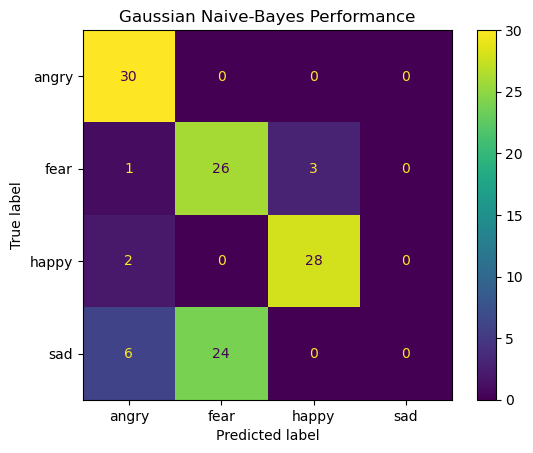

/Users/vishaljanapati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishaljanapati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishaljanapati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

       angry       0.77      1.00      0.87        30
        fear       0.52      0.87      0.65        30
       happy       0.90      0.93      0.92        30
         sad       0.00      0.00      0.00        30

    accuracy                           0.70       120
   macro avg       0.55      0.70      0.61       120
weighted avg       0.55      0.70      0.61       120



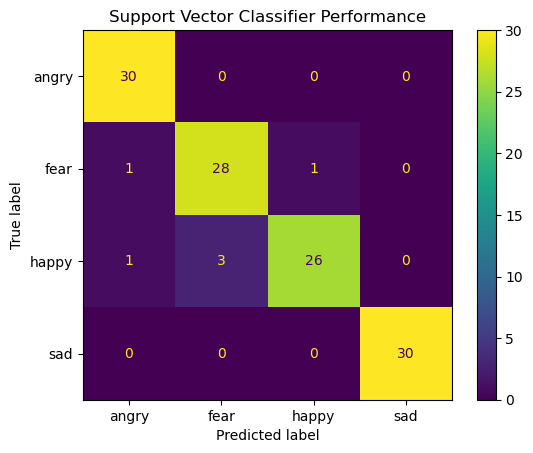

              precision    recall  f1-score   support

       angry       0.94      1.00      0.97        30
        fear       0.90      0.93      0.92        30
       happy       0.96      0.87      0.91        30
         sad       1.00      1.00      1.00        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



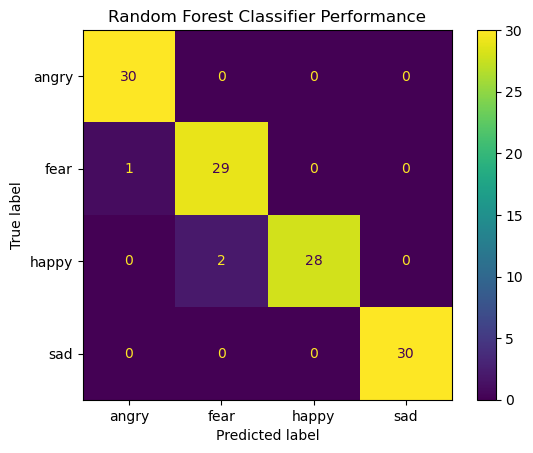

              precision    recall  f1-score   support

       angry       0.97      1.00      0.98        30
        fear       0.94      0.97      0.95        30
       happy       1.00      0.93      0.97        30
         sad       1.00      1.00      1.00        30

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



In [106]:
#6. Model Performance Evaluation


#Gaussian Naive-Bayes
gnb = GaussianNB()
gnb.fit(scaled_X_train, Y_train)
Y_pred = gnb.predict(scaled_X_test)
cmgnb = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmgnb, display_labels = gnb.classes_)
disp.plot()
plt.title("Gaussian Naive-Bayes Performance")
plt.show()
# evaluate the performance of the classifier
print(classification_report(Y_test, Y_pred))

#Support Vector Classifier (SVC)
svm = SVC(probability = True)
svm.fit(scaled_X_train, Y_train)
Y_pred = svm.predict(scaled_X_test)
cmsvm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvm, display_labels=svm.classes_)
disp.plot()
plt.title("Support Vector Classifier Performance")
plt.show()
# evaluate the performance of the classifier
print(classification_report(Y_test, Y_pred))

#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, Y_train)
Y_pred = rfc.predict(scaled_X_test)
csrfc = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=csrfc, display_labels=rfc.classes_)
disp.plot()
plt.title("Random Forest Classifier Performance")
plt.show()
# evaluate the performance of the classifier
print(classification_report(Y_test, Y_pred))